### Data 620 Final Project

**Team No. 6**

- Yohannes Deboch
- Sherranette Tinapunan

---

**Video Presentation**

[link to be entered]

### Twitter Sentiment Analysis about the Statue of Liberty and the New Museum

The new Statue of Liberty Museum just opened on May 16, 2019.

In this project, sentiment analysis of recent tweets with hashtags **#StatueOfLiberty** OR **#StatueOfLibertyMuseum** was done in light of the recent opening of the new museum at Liberty island. An analysis of tweet user location was also done. 

![photo](SOLM_photo.jpg)

### Twitter Data Pull

Process file for Twitter data pull: <br> 
https://github.com/Shetura36/Data-620/blob/master/Final%20Project/Data%20608%20Final%20Project%20-%20Twitter%20Data%20Pull.ipynb

The new Statue of Liberty Museum just opened on **May 16, 2019**.

The Twitter data pull notebook linked above has the code to retrieve data from Twitter since 5/1/2019 with the hashtags #StatueOfLiberty OR #StatueOfLibertyMuseum. The data retrieval specified 1000 tweets; however, Twitter only returned 558 rows.

The returned tweets were saved on a CSV file named "tweets.csv". This is the input file used for sentiment analysis. 



---

### Sentiment Analysis

This project is going to perform sentiment analysis on approximately 500 tweets that have the hashtag #StatueOfLiberty or #StatueOfLibertyMuseum. The sentiment analysis is going to classify the text as positive, neutral, or negative. 

For each sentiment class, we're going to analyze associated hashtags and location. 

**TextBlob** is the package used to do the sentiment analysis: https://textblob.readthedocs.io/en/dev/

---

### Load Libraries

In [54]:
import pandas as pd
from textblob import TextBlob
import re 
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


### Load Tweets 

These are the links to the saved Twitter data pull in CSV format.

The **adjusted CSV file** contains standardize location. The raw location values in the data pull were manually typed in by Twitter users, and they can enter whatever they want as their location. Most provided valid locations that either refer to a state in the United States or refer to a country that is not United States. If more than one location is present, the first location was selected. Because the data set is small (about 560 rows), the standardization was done by manually going through each location value in Excel and converting it to a standard format. When possible, US states were captured. More specific areas in other countries were not standardized. 

Raw output from Twitter data pull:<br> 
https://github.com/Shetura36/Data-620/blob/master/Final%20Project/tweets_ver4.csv

Adjusted CSV file (cleaned location): <br> 
https://github.com/Shetura36/Data-620/blob/master/Final%20Project/tweets_csv_utf8.csv


In [408]:
tweets_df = pd.read_csv("tweets_csv_utf8.csv")

In [409]:
tweets_df.shape

(558, 8)

In [410]:
tweets_df.head(10)

,row_id,tweet_id,created_at,user,location,location_clean,location_type,text
0,0,'1131047852883546118,5/22/2019 4:03,NYCRocksYou,New York,New York,United States,We will be premiering our very first NYC based vlog at Noon! We visit the brand new Statue of Liberty Museum ðŸ—½on itâ€¦ https://t.co/3sGd5CTW2Y
1,1,'1131037675279069185,5/22/2019 3:22,MorinToon,"Maine, USA",Maine,United States,"Give us your white, your rich, entitled and educated. To hell with everybody else #morintoon #TrumpImmigrationâ€¦ https://t.co/qsPp2etPj1"
2,2,'1131022433337659392,5/22/2019 2:22,DWUConservation,"Government District, Dallas",Texas,United States,The #StatueofLiberty app is pretty much everything. Such a cool way to learn about #LadyLiberty #NYC https://t.co/PvYPcguvMg
3,3,'1131007852217286662,5/22/2019 1:24,marvslawrence,"Makati, Philippines",Philippines,Other,"Meet up with the lady. ðŸ—½| Liberty Island, New York City\r\n.\r\n.\r\n.\r\n#vsco #vscocam #vscocollective #nyc #wheninnycâ€¦ https://t.co/OXwNQR836z"
4,4,'1131003078742876160,5/22/2019 1:05,johanson_sven,"Cambridge, MA",Massachusetts,United States,"Just your typical Tuesday, yachting on the Hudson. #newyork #statueofliberty #yacht #sailing #baller #bostonâ€¦ https://t.co/03RYqe4MVy"
5,5,'1130995497907433472,5/22/2019 0:35,polsonforjax,"Jacksonville, FL",Florida,United States,Can you see her!? #StatueOfLiberty #Freedom #BringYourHuddledMasses #WelcomeToNewYork https://t.co/pSppyzHHQC
6,6,'1130982190072909824,5/21/2019 23:42,MorinToon,"Maine, USA",Maine,United States,"Give us your white, your rich, entitled and educated. To hell with everybody else #morintoon #TrumpImmigrationâ€¦ https://t.co/cnZ3idPTYl"
7,7,'1130965347442528256,5/21/2019 22:35,ianteamspirit,United Kingdom,United Kingdom,Other,Our new #statueofliberty #ladyliberty #torchgirl #themed #prop in action tonight @concorde_centre #newyork #usaâ€¦ https://t.co/sGXGDEoYvB
8,8,'1130962355188379649,5/21/2019 22:23,AppleJasonOsuna,Texas,Texas,United States,Cool! #AugmentedReality #StatueofLiberty \r\n@AppleEDU @StatueEllisFdn https://t.co/ZXIKM79StY
9,9,'1130948208648216578,5/21/2019 21:27,KMiller45046553,NaN,Unknown,Unknown,"#Trump has demonized #refugees, snatched their kids and locked them up. He may as well put a #burka on the #StatueofLiberty."


**Utility Functions**

Below are functions for cleaning tweets (remove links and special characters) and for getting sentiment output for a tweet. <br>
Source: https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

In [483]:
#clean tweet text by removing links, special characters using simple regex statements
def clean_tweet(tweet_text):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet_text).split()) 

#classify sentiment of passed tweet using textblob's sentiment method 
def get_tweet_sentiment(tweet_text): 
        analysis = TextBlob(tweet_text) 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

def get_tweet_sentiment_polarity(tweet_text): 
         analysis = TextBlob(tweet_text)
         return analysis.polarity
        
#for plotting horizontal bar plots
def plot_location(data):
    ax = data.plot(kind='barh', x='location', y='count', alpha=0.8, figsize=(10, 12), 
                                   color='#86bf91', zorder=2, width=0.6, legend=0)
    #Source: https://mode.com/example-gallery/python_horizontal_bar/
    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom=0, top=0, labelbottom=1, left=0, right=0, labelleft=1)

    #clear axis labels
    plt.xlabel('')
    plt.ylabel('')

### Sentiment Analysis of Cleaned Tweets

<i>TextBlob</i> is the package used to perform the sentiment analysis. 

> TextBlob is a Python (2 and 3) library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

The function call <code>TextBlob(tweet_text)</code> returns a sentiment polarity score. 

- Sentiment polarity score > 0 evaluates to a positive sentiment
- Sentiment polarity score = 0 evaluates to a neutral sentiment
- Sentiment polarity score < 0 evalutes to a negative sentiment

Source: https://textblob.readthedocs.io/en/dev/_modules/textblob/blob.html

In [412]:
tweets_df['clean_text'] = tweets_df['text'].apply(clean_tweet)
tweets_df['sentiment'] = tweets_df['clean_text'].apply(get_tweet_sentiment)
tweets_df['sentiment_polarity'] = tweets_df['clean_text'].apply(get_tweet_sentiment_polarity)

**Sentiment Result**

As anticipated, most of the tweets are positive or neutral. Only 6% of the tweets are negative.

- Positive: 52%
- Neutral: 42%
- Negative: 6%


In [413]:
tweets_by_type = tweets_df.groupby(['sentiment'])['tweet_id'].count()

In [414]:
tweets_by_type

sentiment
negative    34 
neutral     234
positive    290
Name: tweet_id, dtype: int64

In [415]:
positive_count = tweets_by_type['positive']
negative_count = tweets_by_type['negative']
neutral_count = tweets_by_type['neutral']
size = len(tweets_df.index)

In [416]:
print("Positive: " + "{0:.0f}%".format(positive_count/size * 100))
print("Neutral: " + "{0:.0f}%".format(neutral_count/size * 100))
print("Negative: " + "{0:.0f}%".format(negative_count/size * 100))

Positive: 52%
Neutral: 42%
Negative: 6%


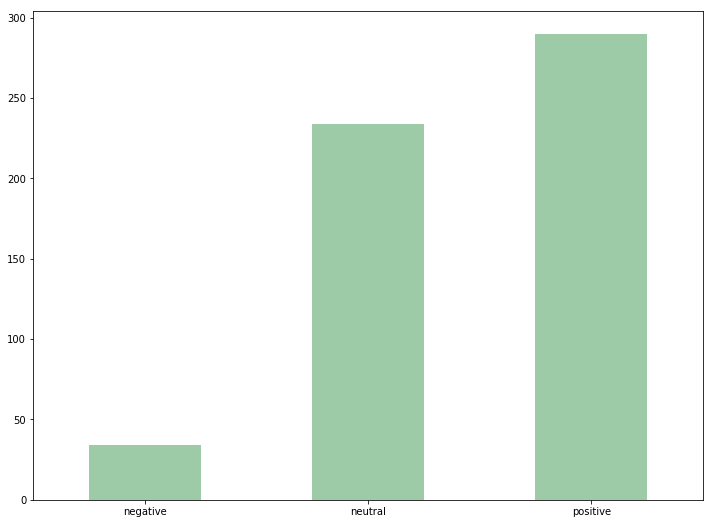

In [462]:
tweets_by_type.plot(kind='bar', alpha=0.8, rot=0, color='#86bf91')
plt.xlabel('')
plt.show()

### Reviewing the Tweets

Because the nature of the subject (a popular landmark that generally signifies positive things like liberty and freedom), we anticipated that most of the tweets should be positive or netural. So when the results came in, we were very interested in looking at the tweets with negative sentiments. Some of the results sound more neutral and some may contain some negative keywords but the meaning is not necessarily negative. 

**Negative tweets**

6% of the tweets resulted in a negative sentiment.  Below you will see a random sample of 10 tweets with negative sentiments. 


- I guess my prediction was wrong #POTUS would go to open #StatueofLibertyMuseum but there’s still time this morning.
- Disgusting full throated unfair no hearted #ImmigrationReform spewed out as well as those who cl   
- #RainbowRailroad is doing great things Too bad #realDonaldTrump &amp the #US aren’t doing shit The
- This climb near killed me #worthit #gellerthill #statueofliberty #budapest #huttonsgotoeurope Budapest Statue o 
- Sometimes it is hard to decide.. #richardmackphoto #colorphotography #blackandwhitephotography #ladyliberty 
-  I’m glueing those suckers in Not right now though because I’m tipsy and clumsy so 
- Give me your tired your poor your horny masses.. 📸 betancisco 👑 svs_ —————————————🥀——————— #LadyLiberty   


**Sounds more neutral**

- Here's a little video of the Statue of Liberty Bag I'm going to take pics later today #statueofliberty 
- The #StatueofLibertyMuseum is now open to public after symbolic ribbon cutting
- #etsy shop New York Statue of Liberty Pillow Cushion Cover #housewares #pillow #black 
-  Black Tie International Statue of Liberty Museum Opening Celebration

**Negative keywords**

- Give me your tired your poor, Your huddled masses yearning to breathe free, The wretched refuse of your teeming sh 
- 7 Wonder of World's Waste to Wonder Delhi India 🇮🇳 #7WonderOfWorlds #WasteToWonder #DelhiIndia #Tajmahal #Vlogs  
- Give Me Your Tired Your Poor Photo by Archie Tucker National Geographic Your Shot
- So strange to think the #StatueofLiberty was made by the same man who created the #EiffelTower !


In [176]:
negative_tweets = tweets_df.loc[tweets_df['sentiment'] == 'negative']['clean_text']
pd.set_option('display.max_colwidth', -1)
negative_tweets.sample(10).reset_index(drop=True)

0    Sometimes it is hard to decide.. #richardmackphoto #colorphotography #blackandwhitephotography #ladylibertyâ€          
1    So much for "your tired your poor Your huddled masses yearning to breathe free The wretched refuse of your teemiâ€     
2    â€Give me your tired give me your poor give me your huddled masses yearning to breathe freeâ€ #statueofliberty        
3    #statueofliberty #ellisisland #ilovebigbuildings #vantagepoint is everything World Trade Center                        
4    _frankie A1 big cities small towns the beach or the mountains there are so much photograph-able places Ifâ€            
5    Black Tie International Statue of Liberty Museum Opening Celebrationâ€                                                 
6    This weekend on The Travel Show goes behind the scenes of the brand new #StatueofLibertyMuseum that opeâ€              
7    #Czechia Yawn another fake drummer that does the #StatueOfLiberty or thinks he is a DJ. #EurovisieSongfestival #TelAviv


**Positive Tweets**

Below are random selection of positive tweets.

In [136]:
positive_tweets = tweets_df.loc[tweets_df['sentiment'] == 'positive']['clean_text']
positive_tweets.sample(10).reset_index(drop=True)

0    The #StatueofLiberty gets an #AR #app to celebrate its new museum #Tech #NewYork #USA #Innovation                  
1    Getting ready for the dedication of the new museum #StatueofLibertyMuseum                                          
2    Save 50 Off #StatueofLiberty Cruise &amp Attraction Combo Experience the best of #NewYorkCity                      
3    Thankful I live in a country where there’s freedom #StatueofLiberty #NewYork #travel                               
4    “A lot of the materials used in the new #StatueofLibertyMuseum building reflect the materials of both the statue an
5    America was ALWAYS Great #StatueOfLiberty #Liberty #Freedom #America                                               
6    Excited about the new #StatueofLiberty museum 🗽🗽                                                                   
7    Lady Liberty stands for opportunity for hard work and for freedom from tyranny...NOT for free handouts redistribut 
8    Been checking out the new S

**Neutral Tweets**

Below are random selection of neutral tweets.

In [419]:
neutral_tweets = tweets_df.loc[tweets_df['sentiment'] == 'neutral']['clean_text']
neutral_tweets.sample(10)

152    Arriving to the opening ceremony of the Statue of Liberty ðŸ— Museum ðŸŽ mcarfrae #statueoflibertymuseumâ€         
330    Trump skips #StatueofLiberty museum opening that celebrates immigrants #America                                    
495    Staten Island Ferry Â· Â· Â· #statenislandferry #nyc #statenislandferryboatcats #newyork #newyorkcityâ€            
520    Her majesty of freedom #thestatueofliberty #liberty #freedom #statueofliberty #hudsonriver #river #cruiseâ€        
65     Sumsher's #SummerVacation #Sumsher reaches #NewYork #UnitedStates to see #StatueofLiberty and share his #Maths Trâ€
409    Hillary Clinton #StatueOfLibertyMuseum ðŸ‡ºðŸ‡                                                                     
31     #OTD in 1884 the #StatueOfLiberty was finally completed But #DYK the journey from idea to reality had taken almosâ€
432    Does anyone else wonder what Ã‰douard RenÃ de Laboulaye &amp FrÃ©dÃ©ric Auguste Bartholdi would say if they werâ€  
20     A walking

### Tweets by Location

Twitter API allows us to pull user location of the tweets. These are location typed in by the users themselves. Because the data set is small, we were able to manage to clean up the location into a standardized format. We also classified the location as **United States** or **Other**.


- United States: 66%
- Other Countries: 13%
- Unknown: 21%

In [425]:
tweets_by_location = tweets_df.groupby(['location_type'])['tweet_id'].count()

In [426]:
tweets_by_location.sort_values()

location_type
Other            73 
Unknown          118
United States    367
Name: tweet_id, dtype: int64

In [422]:
other_count = tweets_by_location['Other']
unknown_count = tweets_by_location['Unknown']
unitedStates_count = tweets_by_location['United States']

print("United States: " + "{0:.0f}%".format(unitedStates_count/size * 100))
print("Other Countries: " + "{0:.0f}%".format(other_count/size * 100))
print("Unknown: " + "{0:.0f}%".format(unknown_count/size * 100))

United States: 66%
Other Countries: 13%
Unknown: 21%


**Tweets by United States and Other Countries**

Majority of the tweets are from United States. 

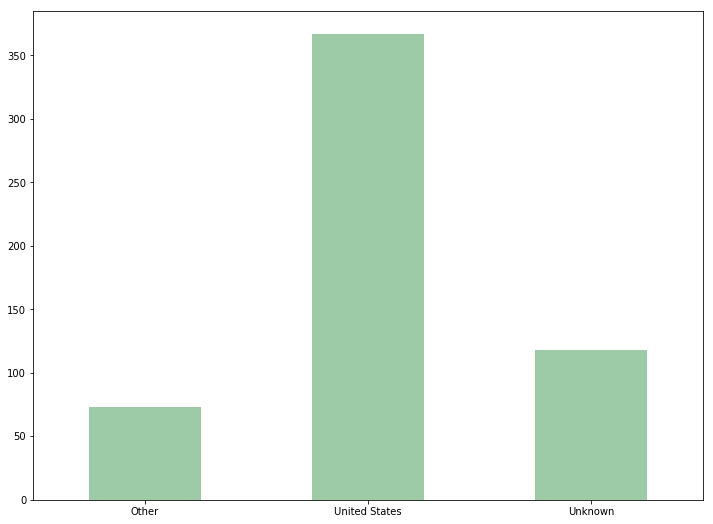

In [461]:
tweets_by_location.plot(kind='bar', alpha=0.8, rot=0, color='#86bf91')
plt.xlabel('')
plt.show()

The code below creates two data frames. One for tweets with *United States* as their user location, and another for tweets with user location from other countries. Unkown locations are excluded.

In [458]:
tweets_USA = tweets_df[tweets_df['location_type'] == 'United States']
tweets_Other = tweets_df[tweets_df['location_type'] == 'Other']

tweets_USA = tweets_USA.groupby(['location_clean'])['tweet_id'].count().to_frame()
tweets_USA = tweets_USA.reset_index(drop=False)
tweets_USA.columns = ['location', 'count']
tweets_USA = tweets_USA[tweets_USA['location'] != 'Unknown']
tweets_USA = tweets_USA.sort_values(by="count", ascending=True)
tweets_USA = tweets_USA.reset_index(drop=True)

tweets_Other = tweets_Other.groupby(['location_clean'])['tweet_id'].count().to_frame()
tweets_Other = tweets_Other.reset_index(drop=False)
tweets_Other.columns = ['location', 'count']
tweets_Other = tweets_Other[tweets_Other['location'] != 'Unknown']
tweets_Other = tweets_Other.sort_values(by="count", ascending=True)
tweets_Other = tweets_Other.reset_index(drop=True)

**Tweets from United States**

It's not a suprise that most of the tweets from the United States are from **New York** (168 tweets). We somewhat expected for New Jersey to be on the top three; however this is not the case. **New Jersey** is number five in the rank with 17 tweets. **Arizona** is a far second (41 tweets). 

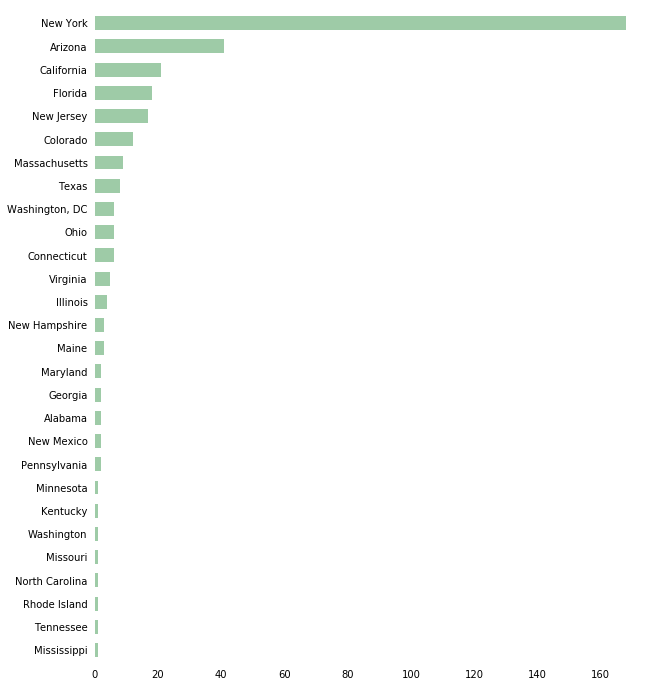

In [488]:
plot_location(tweets_USA)

**Tweets from Other Countries**

The number one spot goes to **United Kingdom** with 21 tweets. **India** takes the second spot with 7 tweets. 

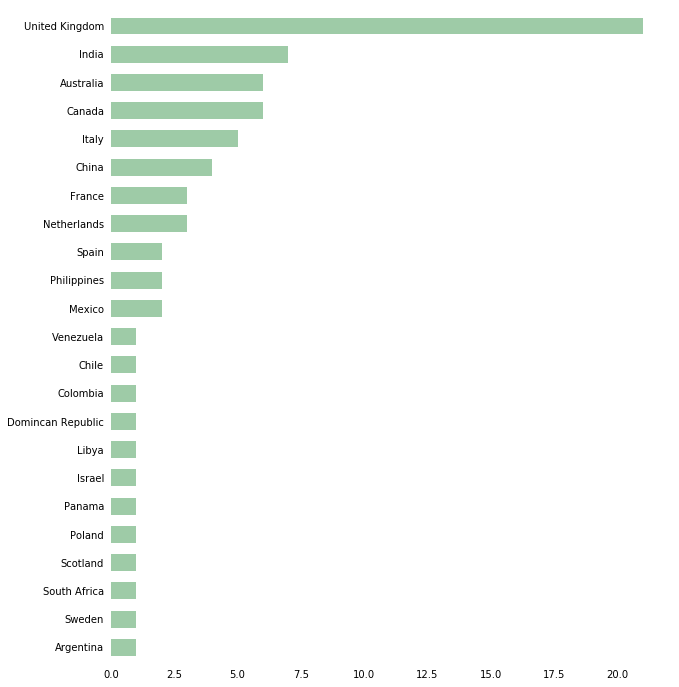

In [487]:
plot_location(tweets_Other)

**Tweet Sentiment by Location**

Below is a plot of of each sentiment broken down by United States and Other Countries. <br> 
As expected, majority of the tweets in each sentiment category are from United States. 

In [245]:
tweets_by_location_sentiment = tweets_df.groupby(['sentiment', 'location_type'])['tweet_id'].count()
tweets_by_location_sentiment

sentiment  location_type
negative   Other            7  
           United States    20 
           Unknown          7  
neutral    Other            22 
           United States    162
           Unknown          50 
positive   Other            44 
           United States    185
           Unknown          61 
Name: tweet_id, dtype: int64

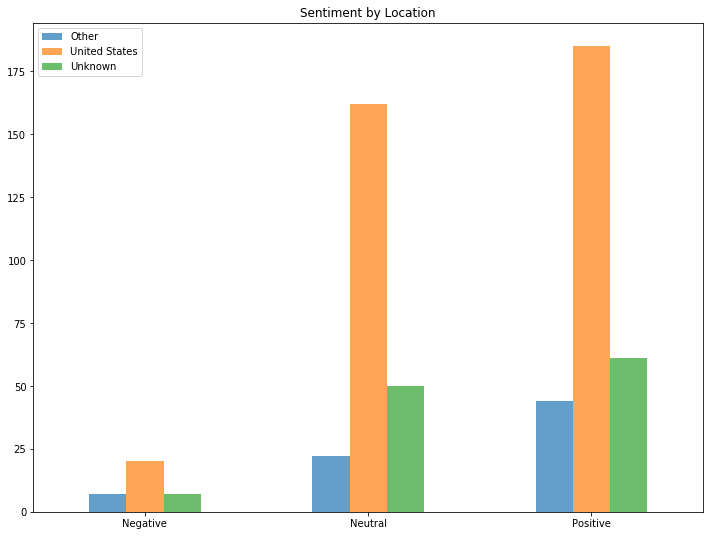

In [463]:
#https://stackoverflow.com/questions/47796264/function-to-create-grouped-bar-plot
df = pd.DataFrame([['Positive','United States',185],['Positive','Other', 44],['Positive','Unknown',61],
                   ['Neutral','United States',162],['Neutral','Other',22],['Neutral','Unknown',50],
                   ['Negative','United States',20],['Negative','Other',7],['Negative','Unknown',7]
                  ],
                  columns=['group','column','val'])
ax = df.pivot("group", "column", "val").plot(kind='bar', title="Sentiment by Location", rot=0, alpha=0.7)
plt.legend()
plt.xlabel('')
plt.show()

**Location of Tweets with Negative Sentiment**

Below is a closer look at user locations of tweets with negative sentiments. It's not surprising that **New York** takes  the lead on this with 6 tweets.

States in the United States with at least 1 negative tweet are **New York, Illinois, Florida, California, Ohio, New Jersey,  Massachusetts, Maryland, Colorado, and Arizona**. 

Other countries with at least 1 negative tweet are **China, Sweden, South Africa, Netherlands, Italy, and Canada**.

In [481]:
tweets_negative = tweets_df[tweets_df['sentiment'] == 'negative']
tweets_negative = tweets_negative.groupby(['location_clean'])['tweet_id'].count().to_frame()
tweets_negative = tweets_negative.reset_index(drop=False)
tweets_negative.columns = ['location', 'count']
tweets_negative = tweets_negative[tweets_negative['location'] != 'Unknown']
tweets_negative = tweets_negative.sort_values(by="count", ascending=True)
tweets_negative = tweets_negative.reset_index(drop=True)

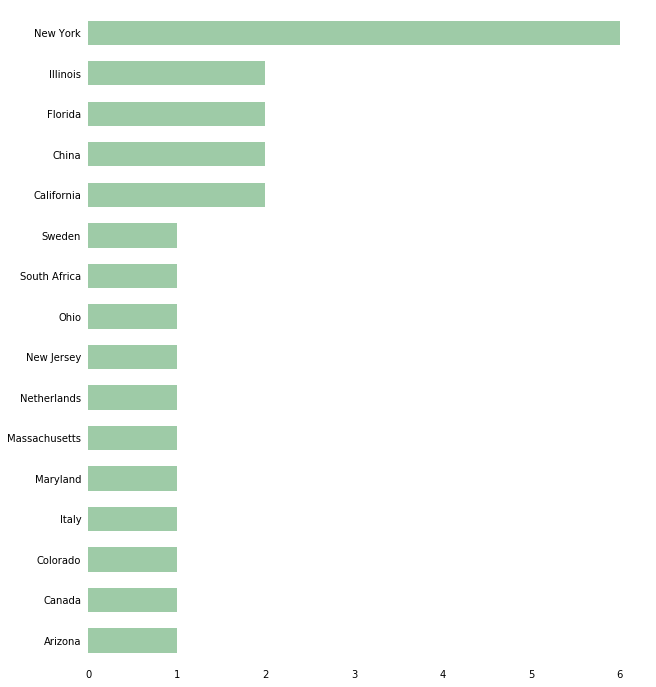

In [484]:
plot_location(tweets_negative)

---

Data 620 - Final Project<br>Team no. 6 (Yohannes Deboch, Sherranette Tinapunan)<br> May 22, 2019

